In [1]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
from mgclass import analysis, MusicGenreDataset, networks
from mgclass.utils import *
from mgclass.training import TrainingRun
from torch import optim

In [2]:
dry_run = False

In [3]:
def run_experiment(model, win_size, batch_size=64, optimizer=None):

    if optimizer is None:
        optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)

    run = TrainingRun(dataset,
                      model,
                      epochs=100,
                      batch_size=batch_size,
                      dry_run=dry_run,
                      repeat_count=100,
                      patience=5,
                      save_path=Path(f"./out/{type(model).__name__}-{win_size}.pt"),
                      optimizer=optimizer)

    run.start(silent=True)
    run.test()
    run.plot(f"{type(model).__name__} - {win_size // 16}ms resolution", additional_info=f"win_length: {win_size}")

## Higher Temporal Resolution

Using genre from playlist source
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

Dataset creation finished in: 96.2477 seconds


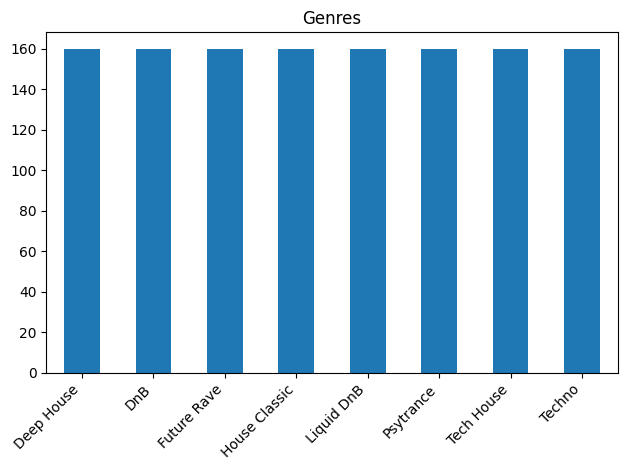

In [4]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(win_length=2048),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        transform=create_crop((128, 128)),
        dry_run = dry_run
)

analysis.summarize_dataset(dataset)

### MusicRecNet

Epoch   1/100:   0%|          | 0.00/100 [00:00<?, ?epochs/s]

Training for 100 epochs
Early stopped at epoch 27
Training finished in: 1334.8852 seconds



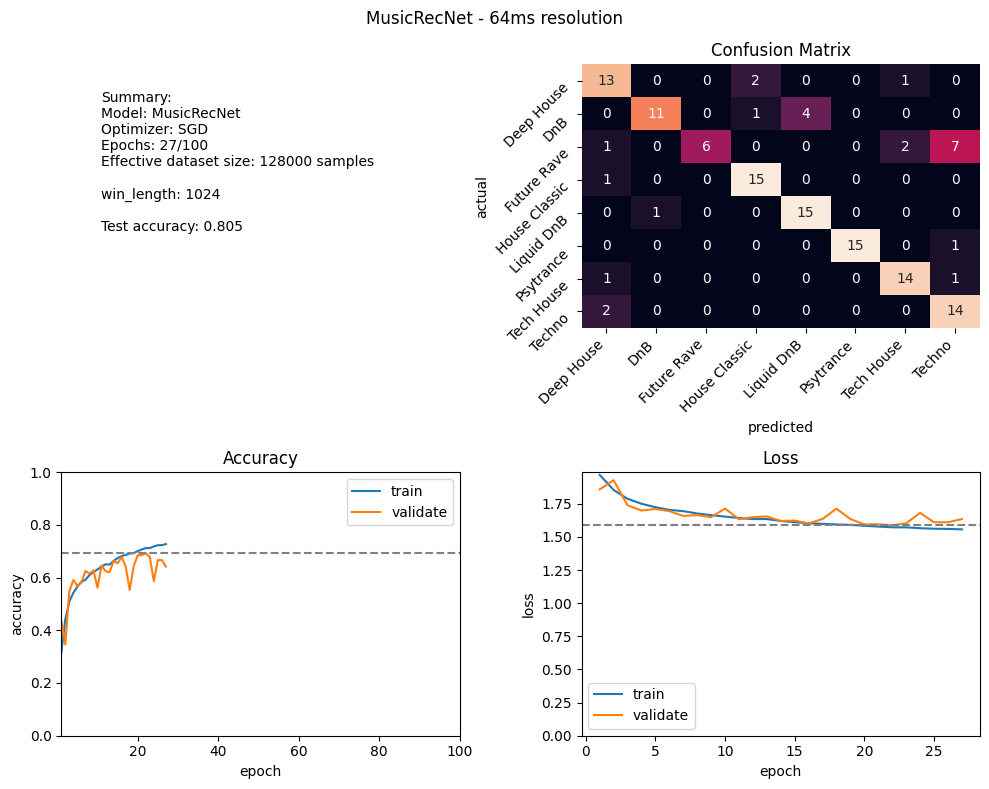

In [5]:
music_rec_net = networks.MusicRecNet(dataset.num_classes)
run_experiment(music_rec_net, batch_size=128, win_size=1024)

### Resnet

Epoch   1/100:   0%|          | 0.00/100 [00:00<?, ?epochs/s]

Training for 100 epochs
Early stopped at epoch 12
Training finished in: 761.6804 seconds



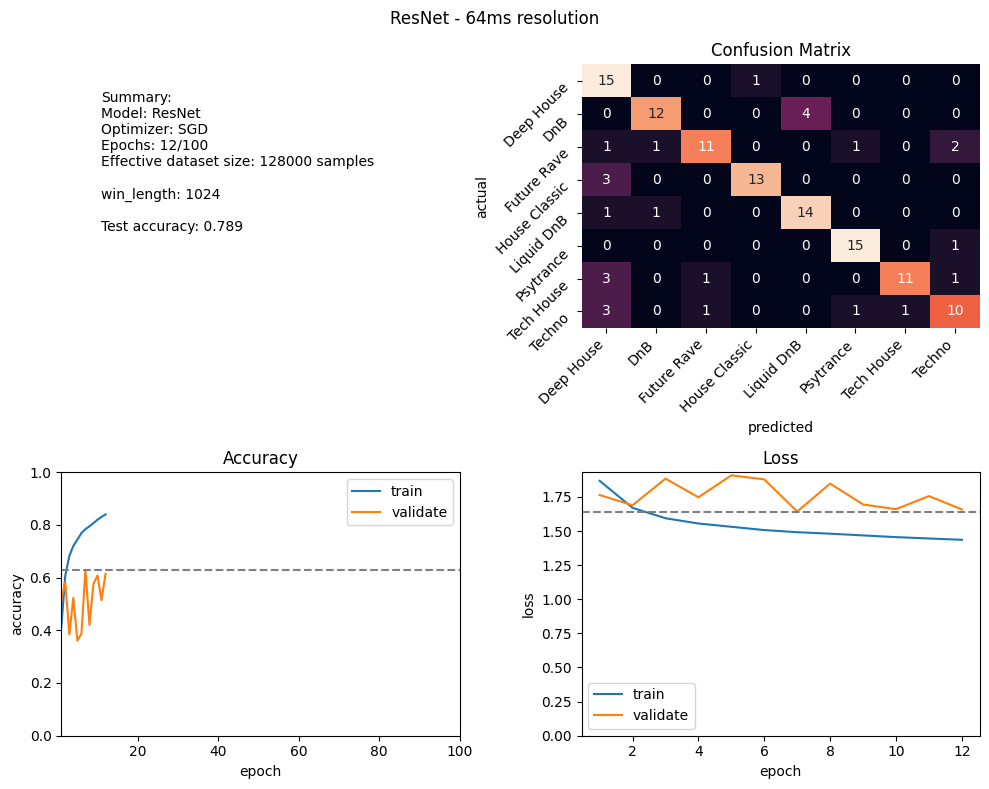

In [6]:
resnet18 = networks.ResNet(dataset.num_classes)
run_experiment(resnet18, batch_size=64, win_size=1024)

### MgcNet

Epoch   1/100:   0%|          | 0.00/100 [00:00<?, ?epochs/s]

Training for 100 epochs
Early stopped at epoch 13
Training finished in: 1115.9798 seconds



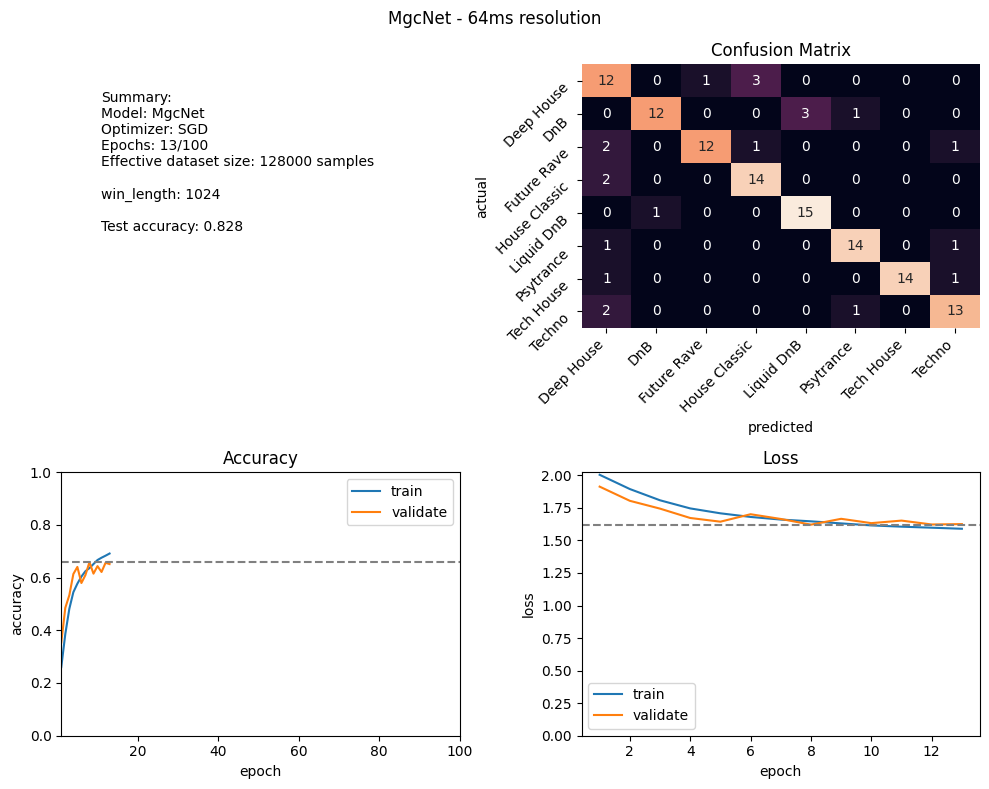

In [7]:
my_net = networks.MgcNet(dataset.num_classes)
run_experiment(my_net, batch_size=128, win_size=1024)

## Lower Temporal Resolution

Using genre from playlist source
Clamping dataset to 160 songs per class. Removing 279 songs.
Preprocessing complete


Creating dataset:   0%|          | 0/1280 [00:00<?, ?it/s]

Dataset creation finished in: 94.9764 seconds


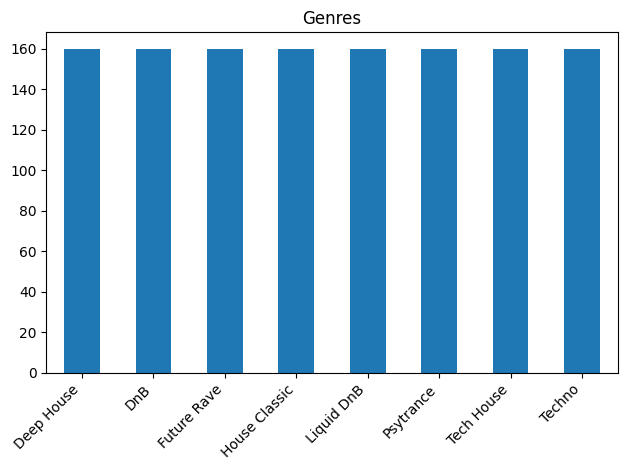

In [8]:
dataset = MusicGenreDataset(
        data_dir=Path("/home/georg/Music/ADL/"),
        preprocess=create_spectrogram(win_length=2048),
        file_transform=mp3_to_wav_location,
        playlist_to_genre=sample_playlist_to_genre,
        transform=create_crop((128, 128)),
        dry_run = dry_run
)

analysis.summarize_dataset(dataset)

### MusicRecNet

Epoch   1/100:   0%|          | 0.00/100 [00:00<?, ?epochs/s]

Training for 100 epochs
Early stopped at epoch 24
Training finished in: 1170.3184 seconds



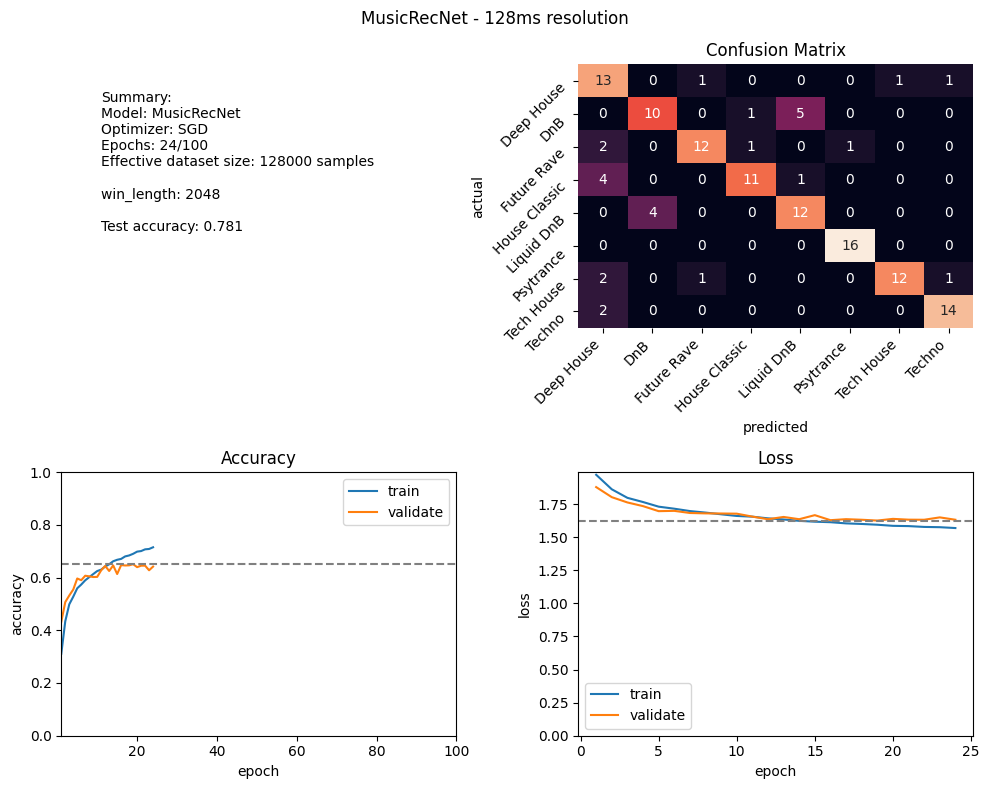

In [9]:
music_rec_net = networks.MusicRecNet(dataset.num_classes)
run_experiment(music_rec_net, batch_size=128, win_size=2048)

### Resnet

Epoch   1/100:   0%|          | 0.00/100 [00:00<?, ?epochs/s]

Training for 100 epochs
Early stopped at epoch 14
Training finished in: 874.6433 seconds



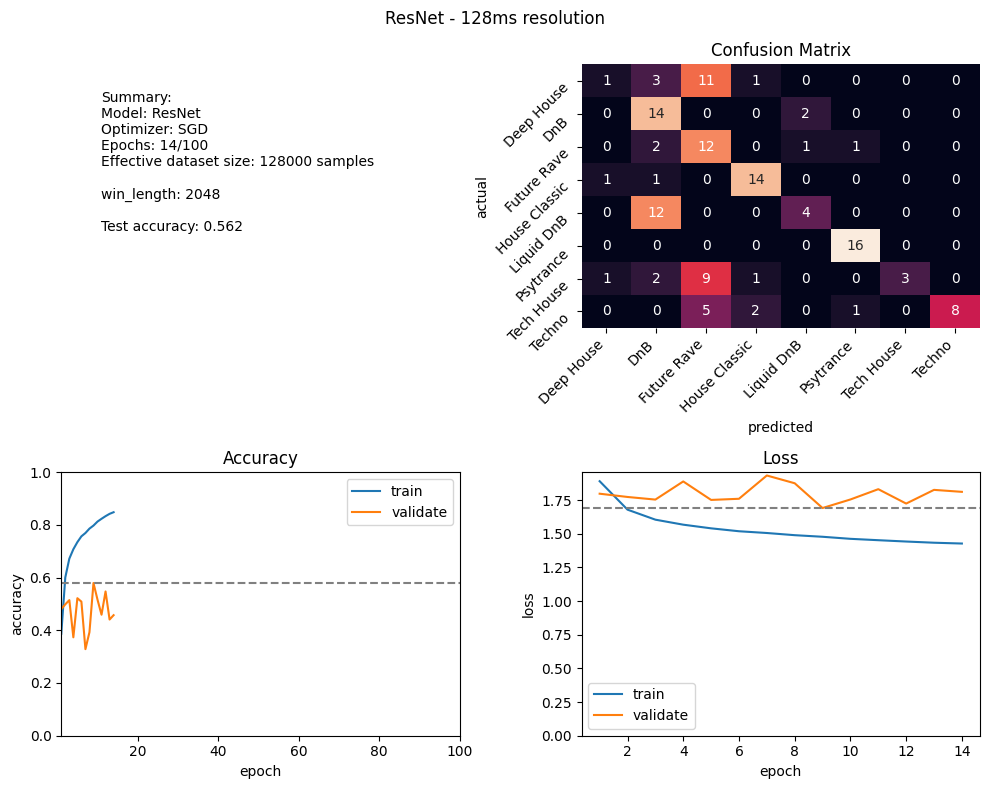

In [10]:
resnet18 = networks.ResNet(dataset.num_classes)
run_experiment(resnet18, batch_size=64, win_size=2048, optimizer=optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005))

### MgcNet

Epoch   1/100:   0%|          | 0.00/100 [00:00<?, ?epochs/s]

Training for 100 epochs
Early stopped at epoch 16
Training finished in: 1363.0178 seconds



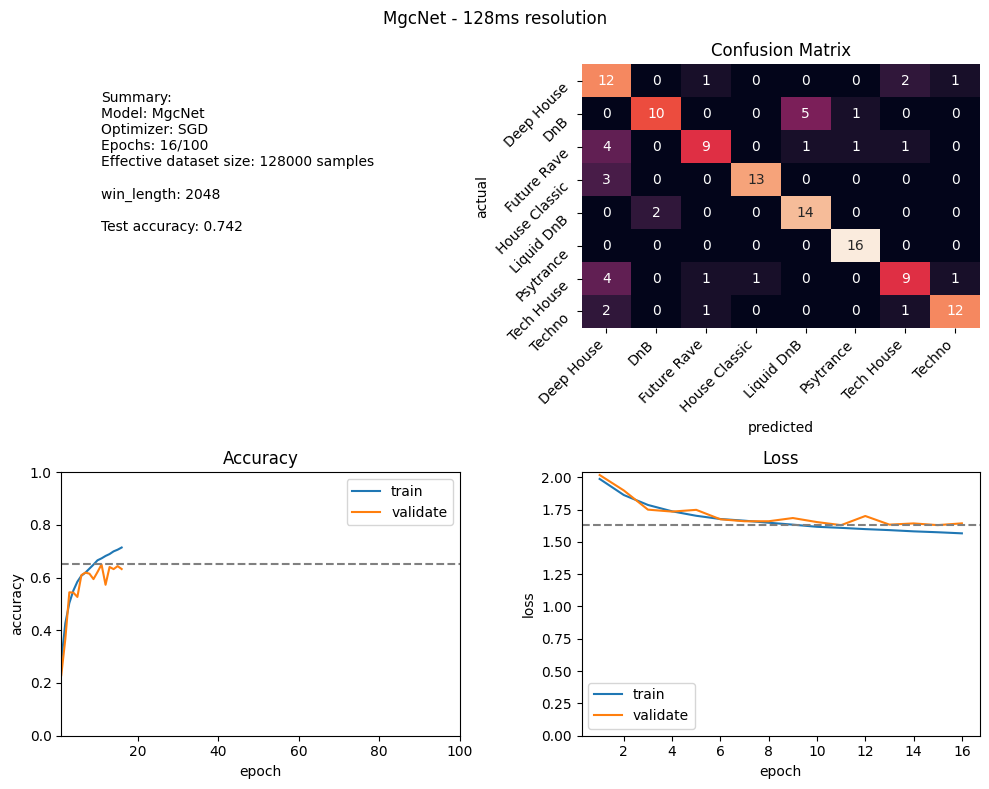

In [11]:
my_net = networks.MgcNet(dataset.num_classes)
run_experiment(my_net, batch_size=128, win_size=2048)